# Supervised Learning: Linear Regression

Pada modul ini akan dikenalkan algoritma regresi linear. Kita akan menggunakan library scikit-learn regression model. Data yang akan digunakan adalah harga rumah di Boston yang teelah disediakan oleh scikit-learn. Kita akan memulainya dengan regresi linear dengan satu variabel dengan menggunakan numpy kemudian dengan menggukan scikit-learn. Pada modul ini akan sedikit dibahas tentang matematika di belakang regresi linear tetapi kita akan lebih banyak praktek langsung pada notebook ini.

Jika kamu tertarik dengan matematika yang lebih dalam silahkan lihat the [wikipedia paage](http://en.wikipedia.org/wiki/Linear_regression) dan kuliah yang diberikan oleh Andrew Ng's pada [coursera](https://www.coursera.org/learn/machine-learning).

Berikut adalah langkah langkah pada modul ini

    Langkah 1: Mempersiapkan data.
    Langkah 2: Memvisualisasikan data
    Langkah 3: Matematika dari Least Squares Method.
    Langkah 4: Menggunakan NumPy untuk regresi linear satu variabel.
    Langkah 5: Mencari error.
    Langkah 6: Menggunakan scikit learn untuk regresi linear multivariabel .
    Langkah 7: Training dan Validasi.  
    Langkah 8: Memprediksi Harga
    Langkah 9: Plot residual
    

### Langkah 1: Mempersiapkan Data

Kita akan menggunakan data yang telah disediakan oleh scikit-learn yang bernama boston dataset

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
# Meload dataset
boston = load_boston()

Kita dapat lihat deskripsi dari data set tersebut

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Langkah 2: Memvisualisasikan data

Jangan lupa untuk melakukan visualisasi secara singkat dengan menggunakan histogram.

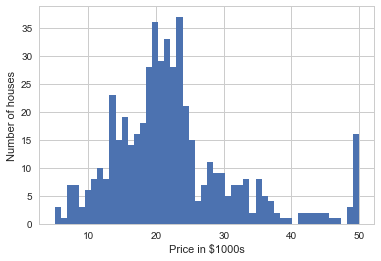

In [7]:
# Histogram harga yang terletak pada target dataset 
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Kita coba lihat scatter plot untuk mencari relasi antara jumlah kamar dengan harga rumah.

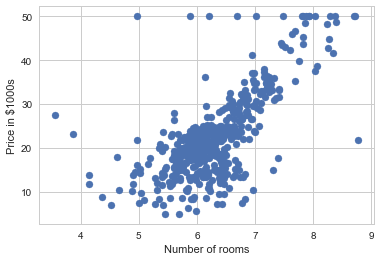

In [8]:
# Plot kolom dengan index ke 5 dengan label RM
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

Bagus! Sekarang kita dapat melihat trend bahwa harga akan meningka seiring dengan jumlah kamar yang ada.

Coba lakukan langkah selanjutnya:

    1.) Menggunakan pandas untuk merubah dataset menjadi DataFrame 
    
    2.) Menggunakan seaborn untuk membuat scatter plot dengan 'linear fit line'

In [9]:
# Merubah bentuk ke dalam DataFrame
boston_df = DataFrame(boston.data)

# Label Kolom
boston_df.columns = boston.feature_names

# Hasil
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Tambahaknan kolom baru berupa harga yang diambil data boston.target

In [10]:
# Set price column for target
boston_df['Price'] = boston.target

Kita lihat hasilnya

In [11]:

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Sekarang kita dapat gunakan seaborn untuk scatter plot bahkan linear fit secara otomatis

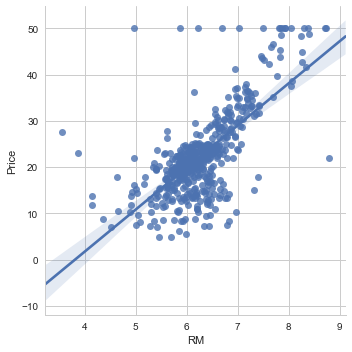

In [12]:

sns.lmplot('RM','Price',data = boston_df)

Hal ini terbatas untuk permasalahan regresi linear yang sederhana. Untuk permasalahan yang lebih kompleks kita akan menggunakan scikit-learn

### Step 3: Matematika di belakang "the Least Squares Method"

Pada kali ini kita akan menggunakan "the Least Squares Method" mengestimasi koefisien. Berikut secara singkat bagaimana metode ini bekerja secara matematis. 

Coba lihat plot yang kita buat diatas menggunakan seaborn. Sekarang bayangakan kita membuat sebuah plot dengan tiap titik dibentuk oleh koordinat X dan Y. Gambar sebuah garis imajiner diantara titik yang kita sebut "best fit line". Kita sebut tiap jarak antara titik dengan garis adalah D. Agar dapat memvisualisasikannya coba lihat gambaar di bawah ini

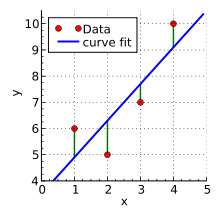

In [13]:

from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Setiap jarak kita sebut D kita beri warna hijau, dan titik merah merupakan koordinat yang dibentuk oleh titik X dan Y. Kemudian kita dapat definisika "best fit line kita sebagai berikut
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

Bagaimana kita mendapatkan garis ini? "The least-square line" merupakan aproksimasi dari titik:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

yang memilik persamaan:
$$ Y = a_{0} +a_{1}X $$
Sebenarnya ini merupakan penulisan ulang dari persamaan garis:
$$Y=mx+b$$

Kita dapat selesaikan konstan a0 dan a1 dengan persamaan berikut:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

Hal ini kita sebut "the normal equations for the least squares line". Terdapat beberapa langkah untuk menyelesaikan permasalahan dalam mencari Y namun, kita dapat menggunkan scikit-learn untuk mencarinya. Jika kamu ingin mengetahui lanjut mengenai formula ini silahkan lihat video berikut.[video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

Saat ini kita akan menggunakan NumPy untuk menyelesaikan regresi linear satu variabel. Kemudian kita akan menggunakan scikit-learn untuk menyelesaikan permasalahan multivariabel.

### Langkah 4: Menggunakan NumPy untuk Regresi Linear satu variabel

Numpy mempunyai Least Square Method dalam library aljabar linear. Kita akan membuaat X dan Y yang akan dibuat oleh Numpy Array. Numpy  

Kita tahu persamaan dari sebuah garis:
$$y=mx+b$$
Kita dapat menulis ulangnnya dengan matriks:
$$y=Ap$$
dimana:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
dan
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

Dengan menggunakan Aljabar linear kita dapat merubah bentuk persamaan tersebut dengan matriks.
Kita akan membuat matriks A dengan menggunakan Numpy.

In [14]:
# X
X = boston_df.RM

# X menjadi 2 dimensi
X = np.vstack(boston_df.RM)

# Y
Y = boston_df.Price

In [15]:
#  membuat matriks A [X 1]
X = np.array( [ [value,1] for value in X ] )

Bagus!. Kita akan dapatkan "best fit line" nya

In [16]:
# Mencari nilai m dan b
m, b = np.linalg.lstsq(X, Y)[0]

Terakhir, kita akan plot hasilnya

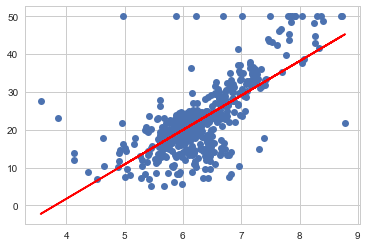

In [17]:
# Plot asli antara kamar dan harga
plt.plot(boston_df.RM,boston_df.Price,'o')

# Plot "Best Fit Line"
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Langkah 5: Mendapatkan Error

Bagus! kita baru saja menyelesaikan regresi linear satu variabel dengan least square method!.Coba lihat apakah kita bisa menemukan error dari "fitted line" tersebut. Silahkan lihat dokumentasi berikut [disini](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [18]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

### Langkah 6: Menggunakan scikit learn untuk implementasi regresi multivariabel 

Sekearang, kita akan menggunakan scikit learn untuk regresi linear multivariabel. Pendekatannya hampir sama dengan regresi linear satu variabel namun, scikit learn dapat menggunakan lebih dari variabel!

Kita mulai dengan mengimport [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) dari modul sklearn.

class sklearn.linear_model.LinearRegression merupakan sebuah estimator. Estimator ini memprediksi nilai berdasarkan data yang diobservasi. Dalam scikit-learn, semua estimator menggunakan fungsi fit() dan predict(). Fungsi fit()  berguna  untuk mempelajari parameter dari sebuah model sedangkan, fungsi predict() untuk memprediksi nilai yang telah dipelajari sebelumnya. Akan sangat mudah bereksperimen dengan berbagai macam model menggunakan scikit-learn karena semua estimator menggunakan fungsi fit() dan predict().

In [29]:
# Mengimport Regresi Linear
import sklearn
from sklearn.linear_model import LinearRegression

Selanjutnya kita akan membuat object dari LinearRegression()

In [30]:
# CMembuat LinearRegression object
lreg = LinearRegression()

Fungsi yang akan dipakai adalah:

lreg.fit() merupakan "fit" dari model linear

lreg.predict() untuk memprediksi Y menggunakan model linear dengan estimasi koefisien.

lreg.score() akan mengembalikan koefisien determinasi (R^2). Sebuah ukuran bagaimana hasil dari hasil yang direplikasi dari sebuah model, silahkan cek [disini](http://en.wikipedia.org/wiki/Coefficient_of_determination)





Kita akan mulai memisahkan dataframe boston kita menjadi data kolom dan data target.

In [31]:
# Data kolom
X_multi = boston_df.drop('Price',1)

# Target
Y_target = boston_df.Price

Kemudian, kita akan passing nilai X dan Y pada object yang telah kita buat.

In [32]:
# menggunkan regresi linear
lreg.fit(X_multi,Y_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Kemudian kita akan liha nila intersep dan koefisien.

In [33]:
print(' Estimasi koefisien intersep adalah %.2f ' %lreg.intercept_)

 Estimasi koefisien intersep adalah 36.49 


In [34]:
print(' Koefisien yang digunakan adalah %d ' % len(lreg.coef_))

 Koefisien yang digunakan adalah 13 


Bagus!, Kita telah membuat persamaan dari sebua garis, disini kita menggunakan 13 koefisien daripada 1 koefisien seperti sebelumnya. Untuk mendapatkan sedikit gambaran kamu bisa lihat dokumentasi [berikut](http://scikit-learn.org/stable/modules/linear_model.html) untuk persamaan ini
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

dimana $$w = (w_1, ...w_p)$$ sebagai koefisien and $$ w_0 $$ sebagai intersep

Selanjutanya kita akang melihat data frame dengan melihat semua fitue dan koefisien yang telah teristemasi dengan regresi linear. 

In [35]:
# Mempersiapkan fitru
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Kolom baru dengan nilai estimasi koefisien
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Tampilkan
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Seperti yang kita duga korelasi tertinggi antar fitur adalah harga rumah dengan jumlah dari kamar.


Selanjutnya kita akan memprediksi harganya

### Langkah 7: Training dan Validasi

Dalam sebuah dataset, dataset trainig digunakan untuk membentuk suatu model, sedangkan data validasi atau tes digunakan untuk memvalidasi model yang kita bangun. Data training bakal terpisah dari data validasi atau test. Cara terbaik untuk emisahkannya adalah dengan mengambil secara acak.

scikit learn telah ada fungsi untuk membagi hal tersebut yang bernama train_test_split.

Parameter yang digunakan adalah X dan Y yang telah disiapkan. Kemudian parameter opsional untuk membagi antara training dan validasi. Kamu bisa mempelajari parameter tersebut [disini](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [38]:
# Membagi data set training dan validasi
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

Kemudian kita lihat hasilnya

In [39]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Bagus! Kita sekarng mempunyai data training dan validasi.

### Langkah 8: Memprediksi Harga

Sekarang kita telah memiliki dataset training dan tes. Saatnya kita menggunakan data training untuk memprediksi dan testing untuk validasi.

In [40]:
# Membuat object regresi
lreg = LinearRegression()

# Sekali lagi kita menggunakn regresi linear tetapi hanya data training
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Kita akan lakukan prediksi menggunakan keduanya

In [41]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Kemudian dapatkan mean square error nya

In [43]:
print("Model X_train dengan with Y_train MSE nya adalah: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Model X_train dengan X_test and Y_test MSE nya adalah: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Model X_train dengan with Y_train MSE nya adalah: 41.64
Model X_train dengan X_test and Y_test MSE nya adalah: 49.56


Kita dapat lihat bahwa antar training dan testing lumayan dekat , bagaimana kita memvisualisasi ini?.

### Langkah 9: Plot Residual

Dalam analisis regresi, perbedaan dalam nilai variabel dependen (y) dengan nilai prediksi (ŷ) disebut residual (e). Setap data poin memiliki satu residual, sehingga
$$Residual = Observed\:value - Predicted\:value $$

Kamu bisa samankan residual ini hampir sama dengan nilai D yang telah kita diskusikan sebelumnya.

Sebuah plot residuan menunjukkan residual pada garis vertikal dan variable independen pada garis horizontal. Jika titik dalam plot residual tersebar disekitar gari horzontal sebuah regresi linear cocok untuk data tersebut, jika tidak sebuah model non linear lebih cocok.

Plot Residual adalah cara yang baik untuk memvisualisai error dari data kamu. Jika data secara acak tersebar disekitar garis nol maka kamu telah melakukan hal yang benar. Jika sebuah pola yang dibentuk maka model kamu tidan menangkap beberapa hal. Mungkin terdapat interaksi antara dua variabel yang belum dimasukkan atau kamu menghitung data yang bergantuk pada waktu. Jika hal ini terjadi  silahkan kembali ke model kamu dan lihat kembali datasetnya.

Sekarang kita akan membuat plot residualnya. Untuk info lebih lanjut lihat link berikut [ini](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

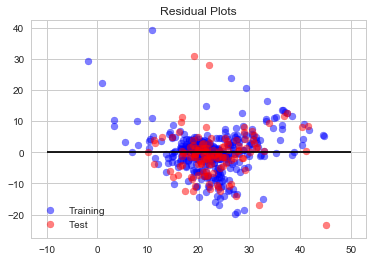

In [44]:
# Scatter plot untuk data training 
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot untuk data testing
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot horizontal untuk nol
plt.hlines(y=0,xmin=-10,xmax=50)

# Label
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Bagus! Kita juga bisa membuat plot ini pada seaborn

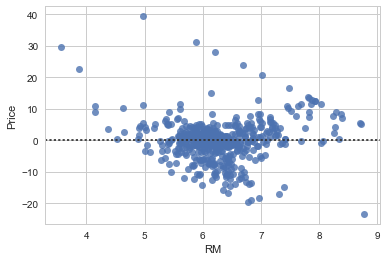

In [45]:
# Plot residual pada seaborn
sns.residplot('RM', 'Price', data = boston_df)

Terima Kasihe:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model